# Getting, Preprocessing, & Feature Engineering  

## Importing Libraries  

In [2]:
# First we need to import the pandas module. Pandas is a library we use for data analysis  
import pandas as pd

## Getting the data

In [3]:
# This is the link we use to get the data
start_year = '2023'
start_month = '10'
start_day = '30'

stop_year = '2024'
stop_month = '02'
stop_day = '26'

blue_colab_url = f'https://colabprod01.pace.edu/api/influx/sensordata/Alan/idk/range?stream=false&start_date={start_year}-{start_month}-{start_day}T00%3A00%3A00%2B00%3A00&stop_date={stop_year}-{stop_month}-{stop_day}T00%3A00%3A00%2B00%3A00'

# This get the data into a pandas Data Frame use this method
df = pd.read_json(blue_colab_url)

In [4]:
df

,measurement,deployment_id,timestamp,sensors
0,Alan,17,2023-10-30 00:00:00+00:00,"{'Cond': 475.7, 'DOpct': 50.57, 'Sal': 0.30000..."
1,Alan,17,2023-10-30 00:15:00+00:00,"{'Cond': 459.3, 'DOpct': 54.22, 'Sal': 0.29, '..."
2,Alan,17,2023-10-30 00:30:00+00:00,"{'Cond': 412.3, 'DOpct': 54.82, 'Sal': 0.26, '..."
3,Alan,17,2023-10-30 00:45:00+00:00,"{'Cond': 391.4, 'DOpct': 57.19, 'Sal': 0.24, '..."
4,Alan,17,2023-10-30 01:00:00+00:00,"{'Cond': 398.5, 'DOpct': 51.89, 'Sal': 0.25, '..."
...,...,...,...,...
10551,Alan,17,2024-02-25 22:45:00+00:00,"{'Cond': 621.0, 'DOpct': 124.5, 'Sal': 0.48, '..."
10552,Alan,17,2024-02-25 23:00:00+00:00,"{'Cond': 620.9, 'DOpct': 123.0, 'Sal': 0.48, '..."
10553,Alan,17,2024-02-25 23:15:00+00:00,"{'Cond': 619.0, 'DOpct': 121.6, 'Sal': 0.48, '..."
10554,Alan,17,2024-02-25 23:30:00+00:00,"{'Cond': 620.6, 'DOpct': 122.1, 'Sal': 0.48, '..."


If you run the code above you should be able to see that each row of the data frame as a timestamp and also data for the timestamp. The data, called sensor has a python dictionary containing the sensor measurements.

In [5]:
df_normalized = pd.concat([df.drop(['sensors'], axis=1), df['sensors'].apply(pd.Series)], axis=1)

In [6]:
df_normalized

,measurement,deployment_id,timestamp,Cond,DOpct,Sal,Temp,Turb,pH
0,Alan,17,2023-10-30 00:00:00+00:00,475.7,50.57,0.30,13.850,51.48,7.27
1,Alan,17,2023-10-30 00:15:00+00:00,459.3,54.22,0.29,13.750,30.45,7.27
2,Alan,17,2023-10-30 00:30:00+00:00,412.3,54.82,0.26,13.550,27.83,7.28
3,Alan,17,2023-10-30 00:45:00+00:00,391.4,57.19,0.24,13.440,28.62,7.29
4,Alan,17,2023-10-30 01:00:00+00:00,398.5,51.89,0.25,13.480,27.56,7.28
...,...,...,...,...,...,...,...,...,...
10551,Alan,17,2024-02-25 22:45:00+00:00,621.0,124.50,0.48,6.326,1.48,7.62
10552,Alan,17,2024-02-25 23:00:00+00:00,620.9,123.00,0.48,6.249,1.31,7.62
10553,Alan,17,2024-02-25 23:15:00+00:00,619.0,121.60,0.48,6.149,1.56,7.62
10554,Alan,17,2024-02-25 23:30:00+00:00,620.6,122.10,0.48,6.241,1.23,7.61


Having columns of dictionaries is confusing right? So let's change it so every key has it's own column.

In [7]:
df_graph = df_normalized.set_index(['timestamp'])
df_graph = df_graph.drop(columns=['measurement', 'deployment_id']) #,'lat','lon'])

#labeling data
def categorize_dissolved_oxygen(dopct):
    if dopct < 41:
        return 'Bad'
    elif 41 <= dopct < 66:
        return 'Warning'
    elif 66 <= dopct < 200:
        return 'Good'
    elif 200 <= dopct < 300:
        return 'Warning'
    elif dopct >= 300:
        return 'Bad'

df_graph['DOpct Bounds'] = df_graph['DOpct'].apply(categorize_dissolved_oxygen)

def categorize_salinity(sal):
    if sal < 0.5:
        return 'Good'
    elif 0.5 <= sal < 1:
        return 'Warning'
    elif sal >= 1:
        return 'Bad'

df_graph['Sal Bounds'] = df_graph['Sal'].apply(categorize_salinity)

def categorize_temperature(temp):
    if temp < 25:
        return 'Good'
    elif 25 <= temp < 31:
        return 'Warning'
    elif temp >= 31:
        return 'Bad'

df_graph['Temp Bounds'] = df_graph['Temp'].apply(categorize_temperature)

def categorize_turbidity(turb_value):
    if turb_value <= 24:
        return 'Good'
    elif turb_value <= 49:
        return 'Warning'
    else:
        return 'Bad'

df_graph['Turb Bounds'] = df_graph['Turb'].apply(categorize_turbidity)

def categorize_ph(ph):
    if ph >= 0 and ph < 5:
        return 'Bad'
    elif ph >= 5 and ph < 7:
        return 'Warning'
    elif ph >= 7 and ph < 9:
        return 'Good'
    elif ph >= 9 and ph < 11:
        return 'Warning'
    elif ph >= 11:
        return 'Bad'

df_graph['pH Bounds'] = df_graph['pH'].apply(categorize_temperature)

df_graph = df_graph[['Cond', 'DOpct', 'DOpct Bounds', 'Sal', 'Sal Bounds', 'Temp', 'Temp Bounds', 'Turb', 'Turb Bounds', 'pH', 'pH Bounds']]

df_graph

,Cond,DOpct,DOpct Bounds,Sal,Sal Bounds,Temp,Temp Bounds,Turb,Turb Bounds,pH,pH Bounds
timestamp,,,,,,,,,,,
2023-10-30 00:00:00+00:00,475.7,50.57,Warning,0.30,Good,13.850,Good,51.48,Bad,7.27,Good
2023-10-30 00:15:00+00:00,459.3,54.22,Warning,0.29,Good,13.750,Good,30.45,Warning,7.27,Good
2023-10-30 00:30:00+00:00,412.3,54.82,Warning,0.26,Good,13.550,Good,27.83,Warning,7.28,Good
2023-10-30 00:45:00+00:00,391.4,57.19,Warning,0.24,Good,13.440,Good,28.62,Warning,7.29,Good
2023-10-30 01:00:00+00:00,398.5,51.89,Warning,0.25,Good,13.480,Good,27.56,Warning,7.28,Good
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-25 22:45:00+00:00,621.0,124.50,Good,0.48,Good,6.326,Good,1.48,Good,7.62,Good
2024-02-25 23:00:00+00:00,620.9,123.00,Good,0.48,Good,6.249,Good,1.31,Good,7.62,Good
2024-02-25 23:15:00+00:00,619.0,121.60,Good,0.48,Good,6.149,Good,1.56,Good,7.62,Good


array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

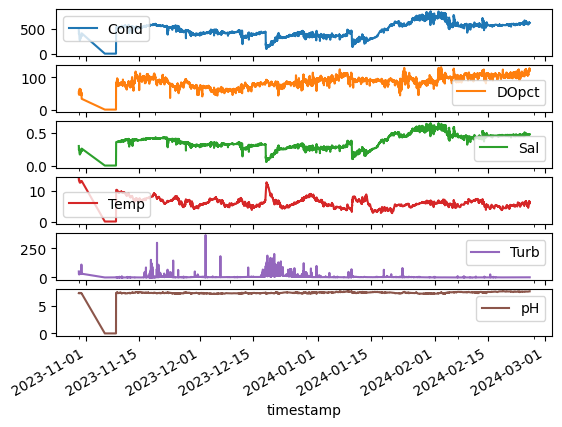

In [8]:
df_graph.plot(subplots=True)

Further ideas
 - Dealing with missing data
 - Label Data as bad/warning/good based off bounds.  

 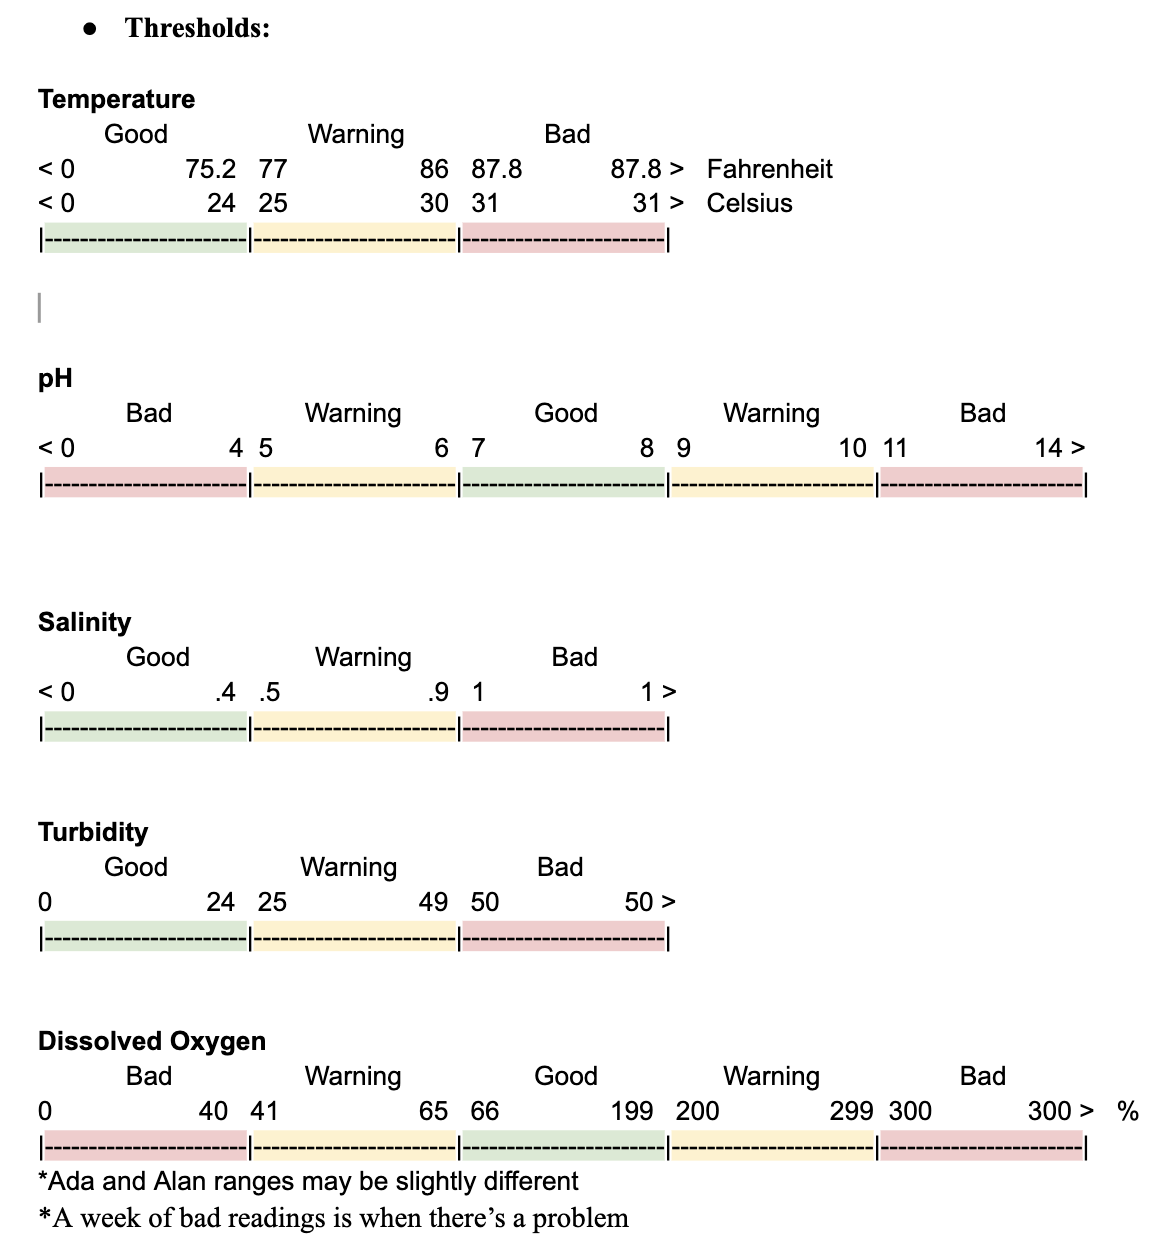